### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2024 Semester 2

## Assignment 2

**Student Name:**    `Luxi Bai`

**Student ID:**     `1527822`

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a written report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

## 1. CNN training

The following code provides a baseline implementation that you will modify by placing code in the speficied sections below. You may also change the batch sizes or image sizes if you wish.

The first block of code loads all the pieces of TensorFlow and Keras we need.  Add more imports here if you need them.


In [1]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)

TensorFlow version:  2.17.0
Keras version:  3.5.0


This block sets the size of the patch that we're going to process with our network.  The patches on disk in the dataset are 64x64 with each image being a pair of patches side by side, so the input images are 128x64. If you change the imsize, the dataloader will rescale the images for you.

In [2]:
# set the image size that we're loading # 64 is the size of the image patches on disk.
imsize = 64

This block loads the training and test datasets. If the 'train' and 'validate' directories are in your current workign directory, the below code will load them. Change the 'directory' arguments if you have put them somewhere else

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='./train/',
    labels='inferred',
    shuffle=True,
    label_mode='int',
    image_size=(2*imsize,imsize))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='./validate/',
    labels='inferred',
    label_mode='int',
    image_size=(2*imsize,imsize))

Found 20000 files belonging to 2 classes.
Found 2500 files belonging to 2 classes.


This block extracts 8 examples from the dataset and displays them and their labels

tf.Tensor([0 1 1 0 1 1 1 1], shape=(8,), dtype=int32)


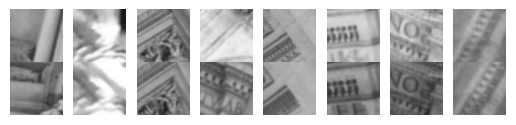

In [4]:
images, labels = train_ds.batch(8).take(1).get_single_element()
images = images[0]
labels = labels[0]
print(labels[0:8])
f, axarr = plt.subplots(1,8)
for i in range(8):
    axarr[i].imshow(images[i,:,:,:].numpy().astype("uint8"))
    axarr[i].set_axis_off()

### Baseline model implementation

This is the basic model to run for part 1 of the assignment before you make your own models

In [5]:
mlp1 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ]
)

In [6]:
mlp1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #use SparseCategoricalCrossentropy because labels are integers. If the labels are one-hot representation, please use CategoricalCrossentropy loss.
           metrics=['accuracy'])

history_mlp = mlp1.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.8006 - loss: 1.3460 - val_accuracy: 0.9044 - val_loss: 0.3394
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9179 - loss: 0.2597 - val_accuracy: 0.9192 - val_loss: 0.2333
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9382 - loss: 0.1769 - val_accuracy: 0.9148 - val_loss: 0.2414
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9530 - loss: 0.1422 - val_accuracy: 0.9140 - val_loss: 0.2560
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9539 - loss: 0.1299 - val_accuracy: 0.9216 - val_loss: 0.2491
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9571 - loss: 0.1156 - val_accuracy: 0.9140 - val_loss: 0.2767
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9630 - loss: 0.1082 - val_accuracy: 0.9136 - val_loss: 0.3081
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9662 - loss: 0.0971 - val_accu

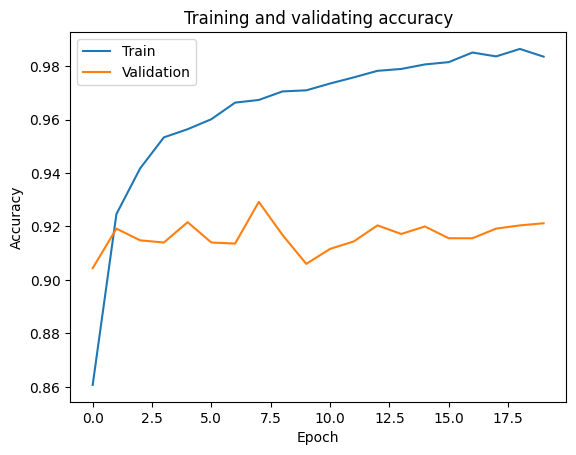

In [7]:
plt.plot(history_mlp.history['accuracy'], label='Train')
plt.plot(history_mlp.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

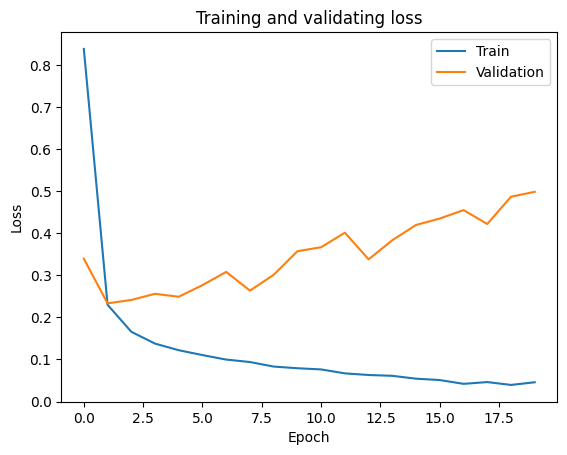

In [8]:
plt.plot(history_mlp.history['loss'], label='Train')
plt.plot(history_mlp.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

## 2 Regularization

Create an implementation for your regularized model here, e.g.

mlp2 = ...

### 2.1 Dropout(0.3)

In [9]:
# Your implementation for part 2 goes here

mlp2 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(0.3),
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ]
)

mlp2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #use SparseCategoricalCrossentropy because labels are integers. If the labels are one-hot representation, please use CategoricalCrossentropy loss.
           metrics=['accuracy'])

history_mlp2 = mlp2.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7963 - loss: 0.7301 - val_accuracy: 0.9228 - val_loss: 0.1919
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9341 - loss: 0.1852 - val_accuracy: 0.9168 - val_loss: 0.2113
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9465 - loss: 0.1485 - val_accuracy: 0.9192 - val_loss: 0.1995
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9561 - loss: 0.1276 - val_accuracy: 0.9240 - val_loss: 0.2159
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9580 - loss: 0.1166 - val_accuracy: 0.9252 - val_loss: 0.2224
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9622 - loss: 0.1065 - val_accuracy: 0.9252 - val_loss: 0.2334
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9670 - loss: 0.0953 - val_accuracy: 0.9292 - val_loss: 0.2434
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9687 - loss: 0.0855 - val_accuracy: 0.

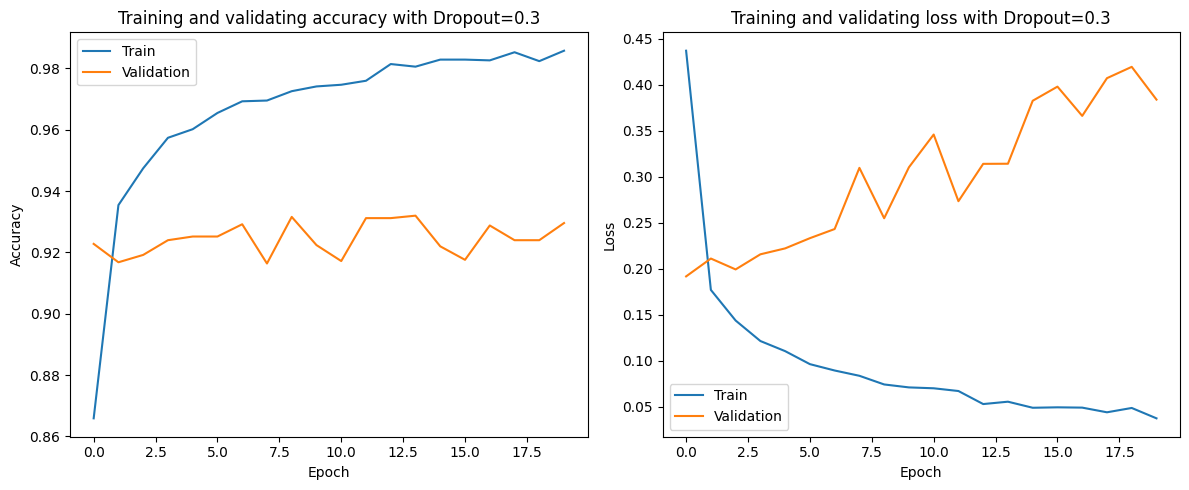

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp2.history['accuracy'], label='Train')
axs[0].plot(history_mlp2.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy with Dropout=0.3')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp2.history['loss'], label='Train')
axs[1].plot(history_mlp2.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss with Dropout=0.3')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

plt.plot(history_mlp2.history['loss'], label='Train')
plt.plot(history_mlp2.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

### 2.2 Dropout(0.5)

In [11]:
# Your implementation for part 2 goes here

mlp2 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(0.5),
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ]
)

mlp2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #use SparseCategoricalCrossentropy because labels are integers. If the labels are one-hot representation, please use CategoricalCrossentropy loss.
           metrics=['accuracy'])

history_mlp2 = mlp2.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7838 - loss: 1.1491 - val_accuracy: 0.9052 - val_loss: 0.2663
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9202 - loss: 0.2417 - val_accuracy: 0.9124 - val_loss: 0.2155
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9408 - loss: 0.1658 - val_accuracy: 0.9248 - val_loss: 0.1950
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9498 - loss: 0.1414 - val_accuracy: 0.9348 - val_loss: 0.1725
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9568 - loss: 0.1252 - val_accuracy: 0.9356 - val_loss: 0.1727
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9584 - loss: 0.1184 - val_accuracy: 0.9288 - val_loss: 0.1878
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9633 - loss: 0.1094 - val_accuracy: 0.9104 - val_loss: 0.2571
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9628 - loss: 0.1048 - val_accuracy: 0.

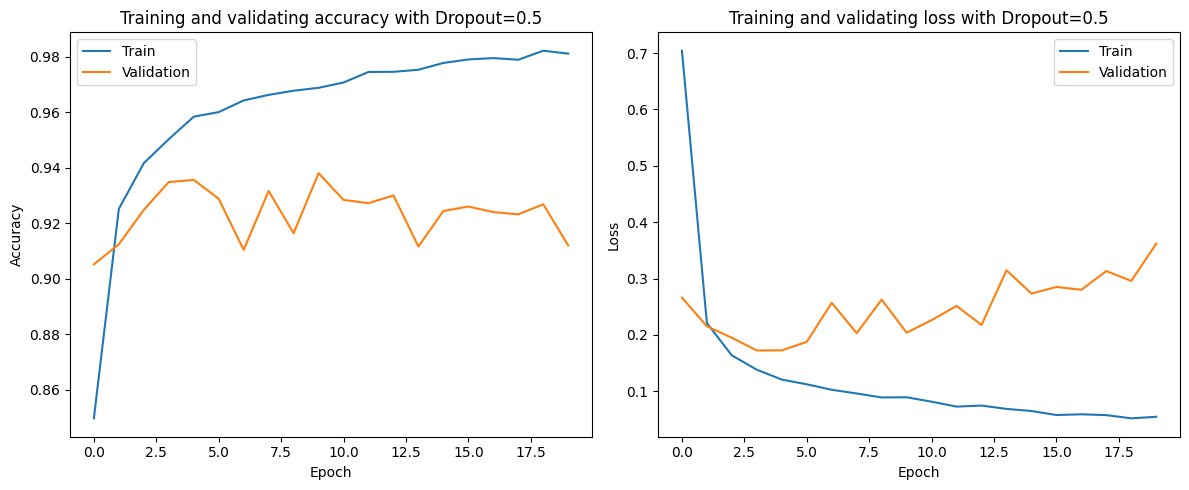

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp2.history['accuracy'], label='Train')
axs[0].plot(history_mlp2.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy with Dropout=0.5')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp2.history['loss'], label='Train')
axs[1].plot(history_mlp2.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss with Dropout=0.5')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 2.3 Dropout(0.8)

In [13]:
mlp2 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(0.8),
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ]
)

mlp2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #use SparseCategoricalCrossentropy because labels are integers. If the labels are one-hot representation, please use CategoricalCrossentropy loss.
           metrics=['accuracy'])

history_mlp2 = mlp2.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7456 - loss: 1.4456 - val_accuracy: 0.9008 - val_loss: 0.2410
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8942 - loss: 0.2968 - val_accuracy: 0.9136 - val_loss: 0.2016
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9194 - loss: 0.2143 - val_accuracy: 0.9216 - val_loss: 0.1907
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9330 - loss: 0.1871 - val_accuracy: 0.9256 - val_loss: 0.1894
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9364 - loss: 0.1716 - val_accuracy: 0.9236 - val_loss: 0.1869
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9395 - loss: 0.1611 - val_accuracy: 0.9256 - val_loss: 0.1836
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9444 - loss: 0.1522 - val_accuracy: 0.9308 - val_loss: 0.1825
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9473 - loss: 0.1458 - 

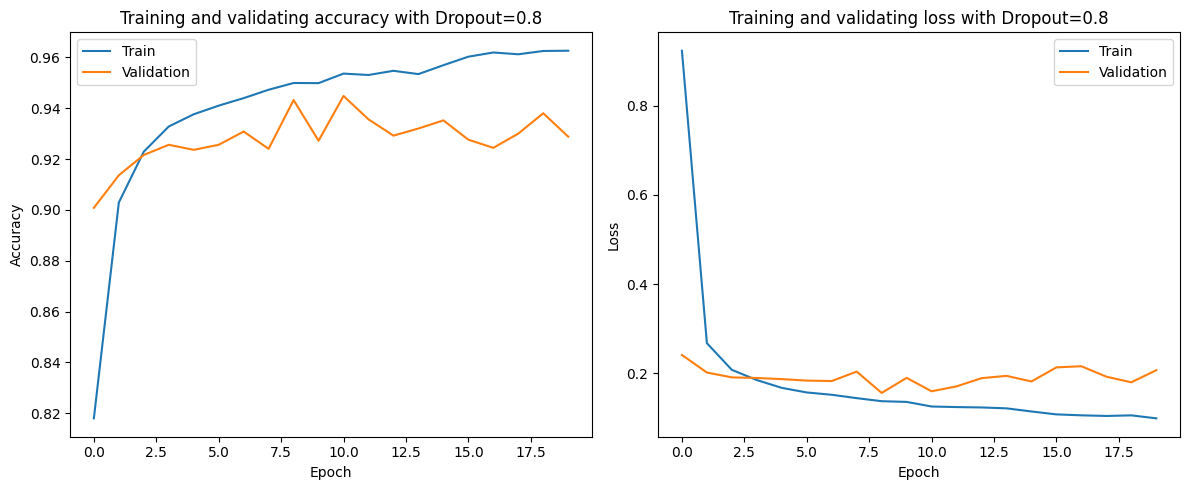

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp2.history['accuracy'], label='Train')
axs[0].plot(history_mlp2.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy with Dropout=0.8')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp2.history['loss'], label='Train')
axs[1].plot(history_mlp2.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss with Dropout=0.8')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 2.4 Dropout(0.9)

In [15]:
# Your implementation for part 2 goes here

mlp2 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(0.9),
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ]
)

mlp2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #use SparseCategoricalCrossentropy because labels are integers. If the labels are one-hot representation, please use CategoricalCrossentropy loss.
           metrics=['accuracy'])

history_mlp2 = mlp2.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.6790 - loss: 1.8094 - val_accuracy: 0.8816 - val_loss: 0.2668
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.8673 - loss: 0.3277 - val_accuracy: 0.8980 - val_loss: 0.2340
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.8913 - loss: 0.2778 - val_accuracy: 0.9120 - val_loss: 0.2004
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9010 - loss: 0.2495 - val_accuracy: 0.9180 - val_loss: 0.1934
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9069 - loss: 0.2367 - val_accuracy: 0.9120 - val_loss: 0.2055
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9138 - loss: 0.2228 - val_accuracy: 0.9212 - val_loss: 0.1796
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9188 - loss: 0.2212 - val_accuracy: 0.9156 - val_loss: 0.1939
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9190 - loss: 0.2150 - 

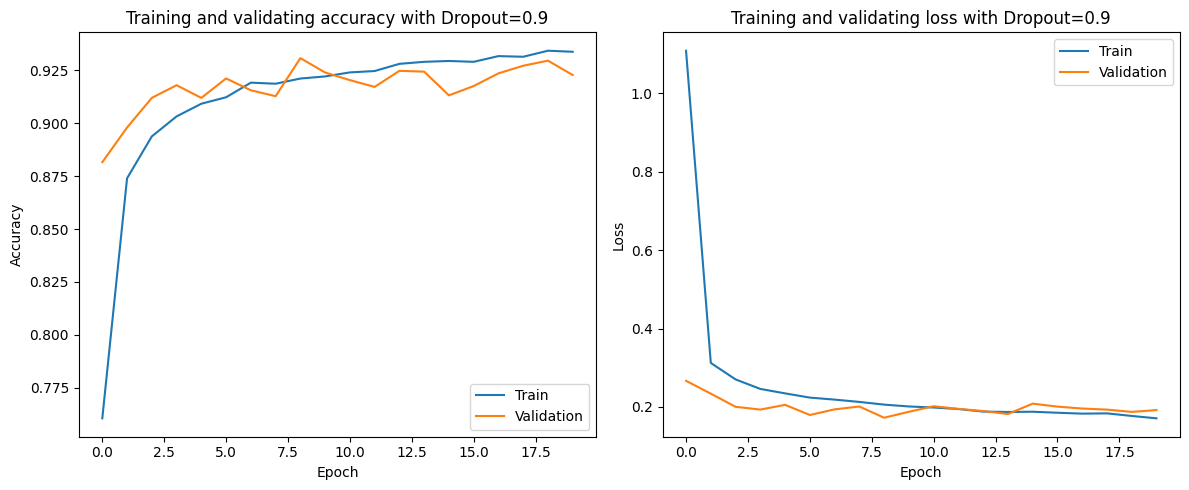

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp2.history['accuracy'], label='Train')
axs[0].plot(history_mlp2.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy with Dropout=0.9')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp2.history['loss'], label='Train')
axs[1].plot(history_mlp2.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss with Dropout=0.9')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 2.5 Dropout(0.95)

In [17]:
mlp2 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(0.95),
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ]
)

mlp2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #use SparseCategoricalCrossentropy because labels are integers. If the labels are one-hot representation, please use CategoricalCrossentropy loss.
           metrics=['accuracy'])

history_mlp2 = mlp2.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.6007 - loss: 1.7516 - val_accuracy: 0.8316 - val_loss: 0.3611
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7987 - loss: 0.4434 - val_accuracy: 0.8860 - val_loss: 0.2692
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8418 - loss: 0.3700 - val_accuracy: 0.9080 - val_loss: 0.2216
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8656 - loss: 0.3225 - val_accuracy: 0.9040 - val_loss: 0.2258
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8719 - loss: 0.3100 - val_accuracy: 0.8924 - val_loss: 0.2369
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8852 - loss: 0.2933 - val_accuracy: 0.9200 - val_loss: 0.1979
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8811 - loss: 0.2893 - val_accuracy: 0.9128 - val_loss: 0.2056
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.8948 - loss: 0.2697 - 

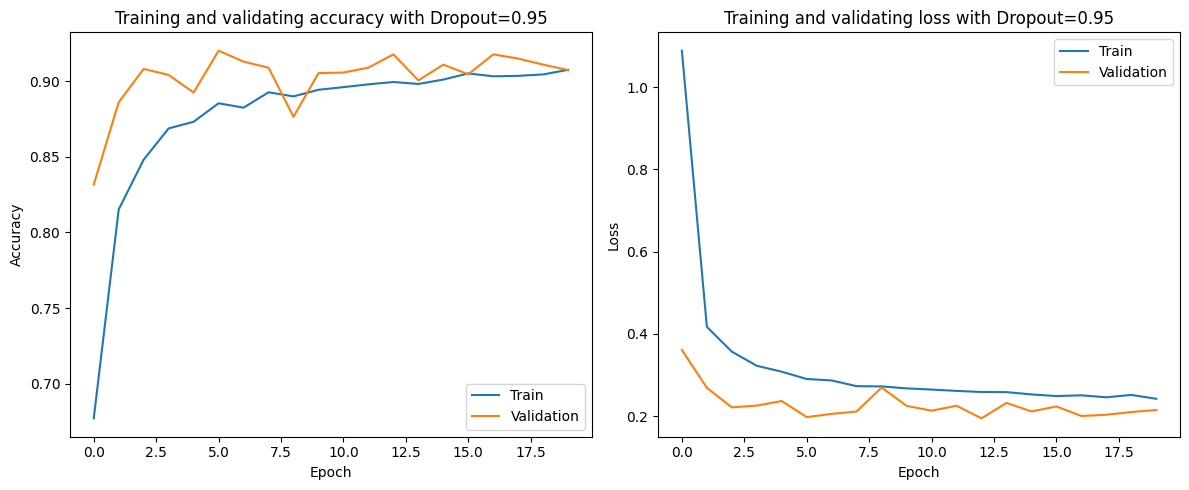

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp2.history['accuracy'], label='Train')
axs[0].plot(history_mlp2.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy with Dropout=0.95')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp2.history['loss'], label='Train')
axs[1].plot(history_mlp2.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss with Dropout=0.95')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

## 3 CNN

Create an implementation for your convolutional model here, e.g.

mlp3 = ...

### 3.1 Setting 1 - Have one convolution layer

filters=32, kernel_size=(3,3), activation='relu', 
filters=64, kernel_size=(3,3), activation='relu', 
Dropout=0.3, dense: 16+2

In [19]:
# Your implementation for part 3 goes here
# Setting 1
mlp3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            
        layers.Reshape((2,imsize,imsize,3)),          
        layers.LayerNormalization(axis=[-1,-2,-3]),   
        
        layers.TimeDistributed(layers.Conv2D(32, (3,3) , activation='relu')),
        layers.TimeDistributed(layers.Conv2D(64, (3,3) , activation='relu')),
        layers.TimeDistributed(layers.Flatten()),

        layers.Flatten(),                             
        layers.Dropout(0.2),

        layers.Dense(16,activation='relu'),           
        layers.Dense(2,activation='softmax')          
    ]
)

mlp3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

history_mlp3 = mlp3.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 218s 341ms/step - accuracy: 0.4989 - loss: 1.3163 - val_accuracy: 0.6076 - val_loss: 0.6929
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 212s 340ms/step - accuracy: 0.5058 - loss: 0.6930 - val_accuracy: 0.4648 - val_loss: 0.6949
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 213s 341ms/step - accuracy: 0.5329 - loss: 0.6847 - val_accuracy: 0.4464 - val_loss: 0.5978
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 276ms/step - accuracy: 0.6340 - loss: 0.6163 - val_accuracy: 0.4632 - val_loss: 0.6264
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - accuracy: 0.6459 - loss: 0.5767 - val_accuracy: 0.4736 - val_loss: 0.5862
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.6966 - loss: 0.5377 - val_accuracy: 0.7088 - val_loss: 0.6220
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.8273 - loss: 0.4255 - val_accuracy: 0.7228 - val_loss: 0.6727
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8829 - los

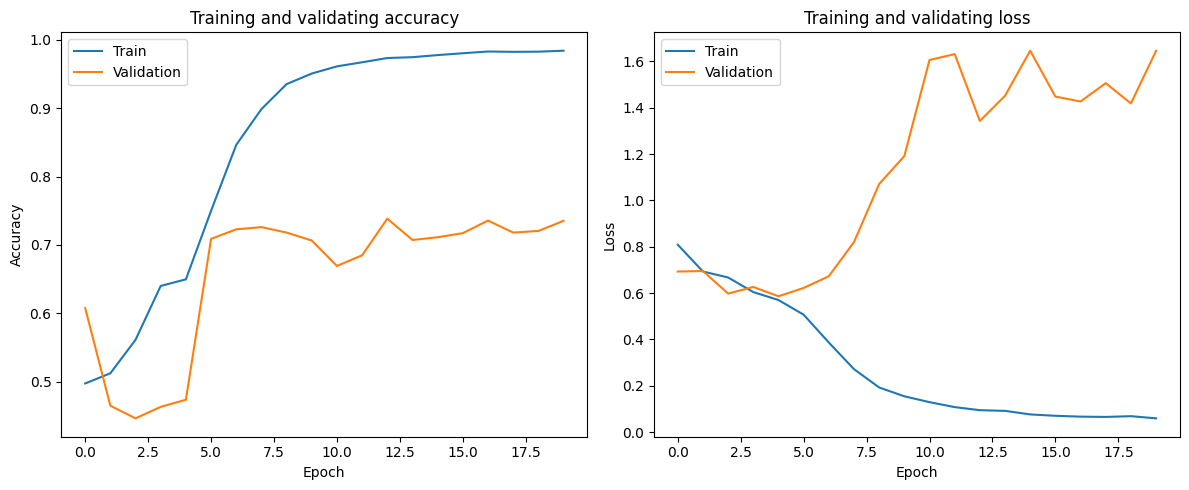

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp3.history['accuracy'], label='Train')
axs[0].plot(history_mlp3.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp3.history['loss'], label='Train')
axs[1].plot(history_mlp3.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 3.2 Setting 2 - Have one convolution layer

filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', 
filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', 
Dropout=0.3, dense: 16+2

In [21]:
# Setting 2
mlp3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            
        layers.Reshape((2,imsize,imsize,3)),          
        layers.LayerNormalization(axis=[-1,-2,-3]),   
        
        layers.TimeDistributed(layers.Conv2D(64, (3,3), strides=(1,1), activation='relu')),
        layers.TimeDistributed(layers.Conv2D(128, (3,3), strides=(1,1), activation='relu')),
        layers.TimeDistributed(layers.Flatten()),

        layers.Flatten(),                             
        layers.Dropout(0.2),

        layers.Dense(16,activation='relu'),           
        layers.Dense(2,activation='softmax')          
    ]
)

mlp3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

history_mlp3 = mlp3.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 179s 285ms/step - accuracy: 0.5038 - loss: 1.1604 - val_accuracy: 0.8000 - val_loss: 0.6928
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 283ms/step - accuracy: 0.4975 - loss: 0.6932 - val_accuracy: 0.8000 - val_loss: 0.6923
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 278ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.8000 - val_loss: 0.6912
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 272ms/step - accuracy: 0.4951 - loss: 0.6932 - val_accuracy: 0.8000 - val_loss: 0.6925
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 266ms/step - accuracy: 0.4979 - loss: 0.6932 - val_accuracy: 0.8000 - val_loss: 0.6919
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 266ms/step - accuracy: 0.4984 - loss: 0.6932 - val_accuracy: 0.8000 - val_loss: 0.6916
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.4970 - loss: 0.6932 - val_accuracy: 0.2000 - val_loss: 0.6935
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 266ms/step - accuracy: 0.4951 -

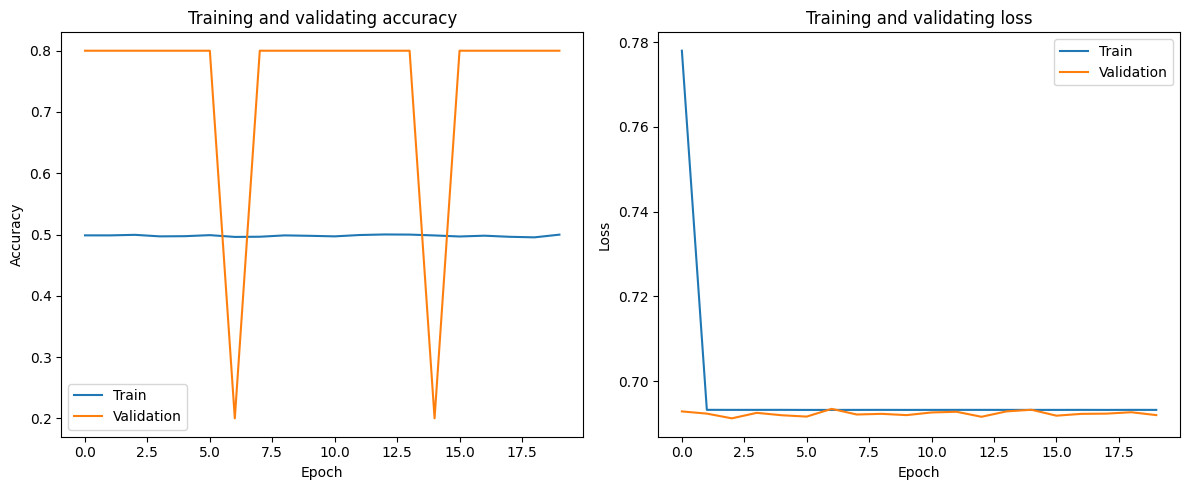

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp3.history['accuracy'], label='Train')
axs[0].plot(history_mlp3.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp3.history['loss'], label='Train')
axs[1].plot(history_mlp3.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 3.3 Setting 3 - Have one convolution layer

filters=32, kernel_size=(5,5), strides=(1,1), activation='relu', 
filters=64, kernel_size=(5,5), strides=(1,1), activation='relu', 
Dropout=0.3, dense: 32+4

In [23]:
# Setting 3
mlp3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            
        layers.Reshape((2,imsize,imsize,3)),          
        layers.LayerNormalization(axis=[-1,-2,-3]),   
        
        layers.TimeDistributed(layers.Conv2D(32, (5,5), strides=(1,1), activation='relu')),
        layers.TimeDistributed(layers.Conv2D(64, (5,5), strides=(1,1), activation='relu')),
        layers.TimeDistributed(layers.Flatten()),

        layers.Flatten(),                             
        layers.Dropout(0.2),

        layers.Dense(16,activation='relu'),           
        layers.Dense(2,activation='softmax')          
    ]
)

mlp3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

history_mlp3 = mlp3.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 135ms/step - accuracy: 0.5478 - loss: 0.8883 - val_accuracy: 0.7736 - val_loss: 0.4158
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.8153 - loss: 0.4201 - val_accuracy: 0.7964 - val_loss: 0.3936
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.8493 - loss: 0.3295 - val_accuracy: 0.8088 - val_loss: 0.3545
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.8664 - loss: 0.2911 - val_accuracy: 0.8276 - val_loss: 0.3239
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.8919 - loss: 0.2535 - val_accuracy: 0.8676 - val_loss: 0.3606
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.9274 - loss: 0.2047 - val_accuracy: 0.8784 - val_loss: 0.3960
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.9500 - loss: 0.1513 - val_accuracy: 0.8560 - val_loss: 0.5535
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - accuracy: 0.9656 - loss: 0

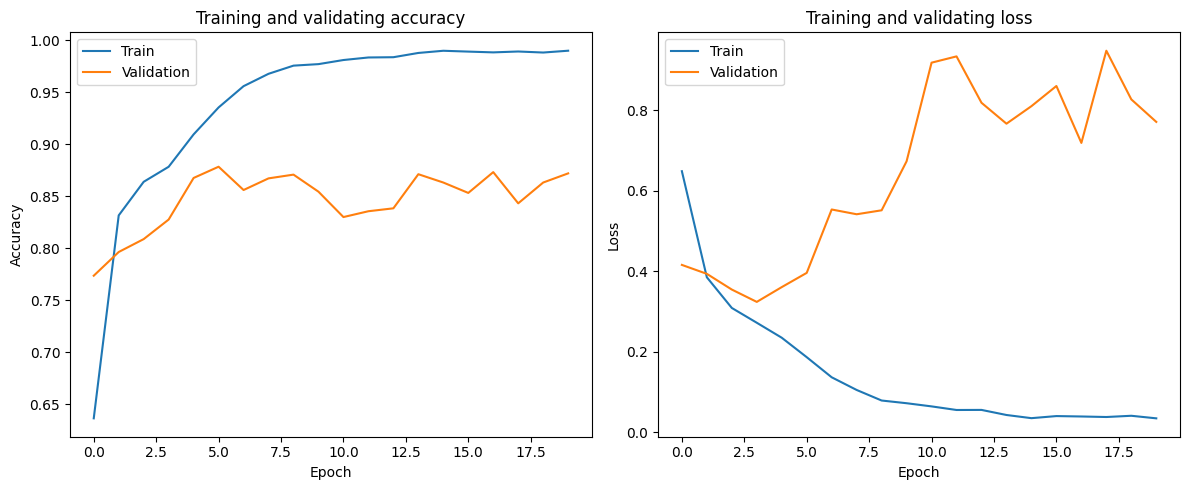

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp3.history['accuracy'], label='Train')
axs[0].plot(history_mlp3.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp3.history['loss'], label='Train')
axs[1].plot(history_mlp3.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 3.4 Setting 4 - Have two convolution layers

filters=16, kernel_size=(3,3,3), activation='relu', MaxPooling2D(1,2,2),
filters=32, kernel_size=(3,3,3), activation='relu', MaxPooling2D(1,2,2),
No Dropout, dense: 16+2

In [25]:
# Setting 4
mlp3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            
        layers.Reshape((2,imsize,imsize,3)),          
        layers.LayerNormalization(axis=[-1,-2,-3]),   
        
        # The first convolution layer
        layers.Conv3D(32, (3,3,3) , activation='relu', padding='same'),
        layers.MaxPooling3D((1,2,2)),

        # The second convolution layer
        layers.Conv3D(64, (3,3,3) , activation='relu', padding='same'),
        layers.MaxPooling3D((1,2,2)),

        layers.Flatten(),   
        layers.Dropout(0.2),     

        layers.Dense(16,activation='relu'),           
        layers.Dense(2,activation='softmax')          
    ]
)

mlp3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

history_mlp3 = mlp3.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.9410 - loss: 0.1581 - val_accuracy: 0.9868 - val_loss: 0.0625
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.9734 - loss: 0.0763 - val_accuracy: 0.9876 - val_loss: 0.0463
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.9764 - loss: 0.0654 - val_accuracy: 0.9584 - val_loss: 0.1186
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.9801 - loss: 0.0552 - val_accuracy: 0.9760 - val_loss: 0.0698
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.9861 - loss: 0.0407 - val_accuracy: 0.9844 - val_loss: 0.0576
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.9893 - loss: 0.0306 - val_accuracy: 0.9732 - val_loss: 0.0883
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.9884 - loss: 0.0329 - val_accuracy: 0.9784 - val_loss: 0.0797
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.9891 - loss: 0.0287 - 

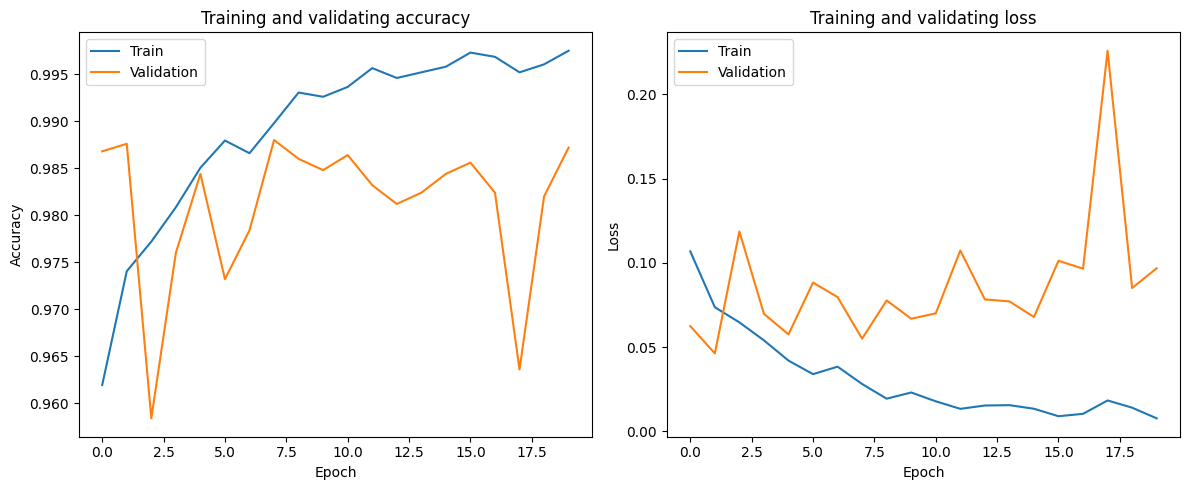

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp3.history['accuracy'], label='Train')
axs[0].plot(history_mlp3.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp3.history['loss'], label='Train')
axs[1].plot(history_mlp3.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 3.5 Setting 5 - Have two convolution layers

filters=32, kernel_size=(3,3), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(1,1)), Dropout(0.3), 
filters=64, kernel_size=(3,3), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(1,1)), Dropout(0.3), 
Dropout(0.3), dense: 16+2

In [27]:
# Setting 5
mlp3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            
        layers.Reshape((2,imsize,imsize,3)),          
        layers.LayerNormalization(axis=[-1,-2,-3]),   
        
        # The first convolution layer
        layers.TimeDistributed(layers.Conv2D(32, (3,3) , strides=(1,1), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (3,3) , strides=(1,1))),
        layers.TimeDistributed(layers.Dropout(0.2)),

        # The second convolution layer
        layers.TimeDistributed(layers.Conv2D(64, (3,3) , strides=(1,1), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (3,3) , strides=(1,1))),
        layers.TimeDistributed(layers.Dropout(0.2)),

        layers.Flatten(),    
        layers.Dropout(0.2),    

        layers.Dense(16,activation='relu'),           
        layers.Dense(2,activation='softmax')          
    ]
)

mlp3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

history_mlp3 = mlp3.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 191ms/step - accuracy: 0.5304 - loss: 1.0795 - val_accuracy: 0.5852 - val_loss: 0.5253
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 195ms/step - accuracy: 0.7449 - loss: 0.5066 - val_accuracy: 0.8076 - val_loss: 0.4316
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 201ms/step - accuracy: 0.8449 - loss: 0.3973 - val_accuracy: 0.8800 - val_loss: 0.3446
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 204ms/step - accuracy: 0.8586 - loss: 0.3677 - val_accuracy: 0.8572 - val_loss: 0.3464
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 209ms/step - accuracy: 0.8699 - loss: 0.3426 - val_accuracy: 0.8808 - val_loss: 0.3007
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 208ms/step - accuracy: 0.8791 - loss: 0.3164 - val_accuracy: 0.8476 - val_loss: 0.3501
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 206ms/step - accuracy: 0.8912 - loss: 0.2890 - val_accuracy: 0.8396 - val_loss: 0.3853
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 206ms/step - accuracy: 0.9024 -

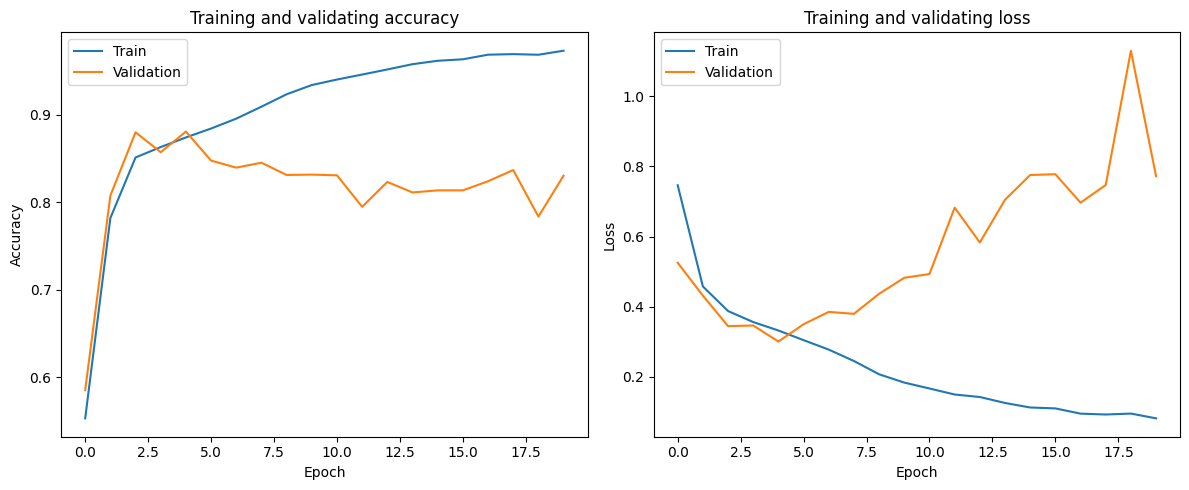

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp3.history['accuracy'], label='Train')
axs[0].plot(history_mlp3.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp3.history['loss'], label='Train')
axs[1].plot(history_mlp3.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 3.6 Setting 6 - Have two convolution layers

filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(1,1)), Dropout(0.2), 
filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(1,1)), Dropout(0.2), 
Dropout(0.2), dense: 32+4

In [29]:
# Setting 6
mlp3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            
        layers.Reshape((2,imsize,imsize,3)),          
        layers.LayerNormalization(axis=[-1,-2,-3]),   
        
        # The first convolution layer
        layers.TimeDistributed(layers.Conv2D(32, (3,3) , strides=(1,1), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (3,3) , strides=(1,1))),
        layers.TimeDistributed(layers.Dropout(0.1)),

        # The second convolution layer
        layers.TimeDistributed(layers.Conv2D(64, (3,3) , strides=(1,1), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (3,3) , strides=(1,1))),
        layers.TimeDistributed(layers.Dropout(0.1)),
        
        layers.Flatten(),  
        layers.Dropout(0.1),      

        layers.Dense(16,activation='relu'),           
        layers.Dense(2,activation='softmax')          
    ]
)

mlp3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

history_mlp3 = mlp3.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 206ms/step - accuracy: 0.5181 - loss: 1.3883 - val_accuracy: 0.7768 - val_loss: 0.6595
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.5761 - loss: 0.6725 - val_accuracy: 0.7448 - val_loss: 0.6462
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.6127 - loss: 0.6535 - val_accuracy: 0.7244 - val_loss: 0.6196
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.6505 - loss: 0.6295 - val_accuracy: 0.6676 - val_loss: 0.6509
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.6885 - loss: 0.5896 - val_accuracy: 0.6900 - val_loss: 0.6615
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.7355 - loss: 0.5399 - val_accuracy: 0.6476 - val_loss: 0.7825
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.7780 - loss: 0.4836 - val_accuracy: 0.6956 - val_loss: 0.7230
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.8085 -

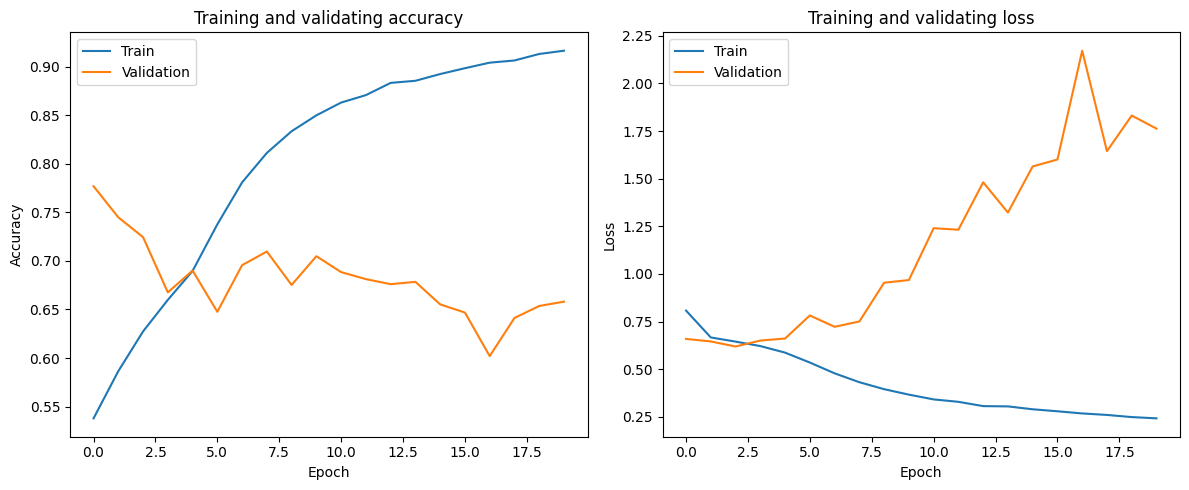

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp3.history['accuracy'], label='Train')
axs[0].plot(history_mlp3.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp3.history['loss'], label='Train')
axs[1].plot(history_mlp3.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 3.7 Setting 7 - Have two convolution layers

filters=32, kernel_size=(5,5), strides=(1,1), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(1,1)), Dropout(0.2), 
filters=64, kernel_size=(5,5), strides=(1,1), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(1,1)), Dropout(0.2), 
Dropout(0.2)

In [31]:
# Setting 7
mlp3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            
        layers.Reshape((2,imsize,imsize,3)),          
        layers.LayerNormalization(axis=[-1,-2,-3]),   
        
        # The first convolution layer
        layers.TimeDistributed(layers.Conv2D(32, (5,5) , strides=(1,1), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (5,5) , strides=(1,1))),
        layers.TimeDistributed(layers.Dropout(0.2)),

        # The second convolution layer
        layers.TimeDistributed(layers.Conv2D(64, (5,5) , strides=(1,1), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (5,5) , strides=(1,1))),
        layers.TimeDistributed(layers.Dropout(0.2)),

        
        layers.Flatten(),    
        layers.Dropout(0.2),    

        layers.Dense(16,activation='relu'),           
        layers.Dense(2,activation='softmax')          
    ]
)

mlp3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

history_mlp3 = mlp3.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 222ms/step - accuracy: 0.5099 - loss: 1.8645 - val_accuracy: 0.7596 - val_loss: 0.6970
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 212ms/step - accuracy: 0.5372 - loss: 0.6840 - val_accuracy: 0.7648 - val_loss: 0.6762
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.5537 - loss: 0.6665 - val_accuracy: 0.4504 - val_loss: 0.6031
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.6366 - loss: 0.5879 - val_accuracy: 0.5056 - val_loss: 0.5773
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.6504 - loss: 0.5693 - val_accuracy: 0.7624 - val_loss: 0.5646
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.7090 - loss: 0.5501 - val_accuracy: 0.7500 - val_loss: 0.5672
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.7230 - loss: 0.5395 - val_accuracy: 0.7416 - val_loss: 0.5662
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.7597 -

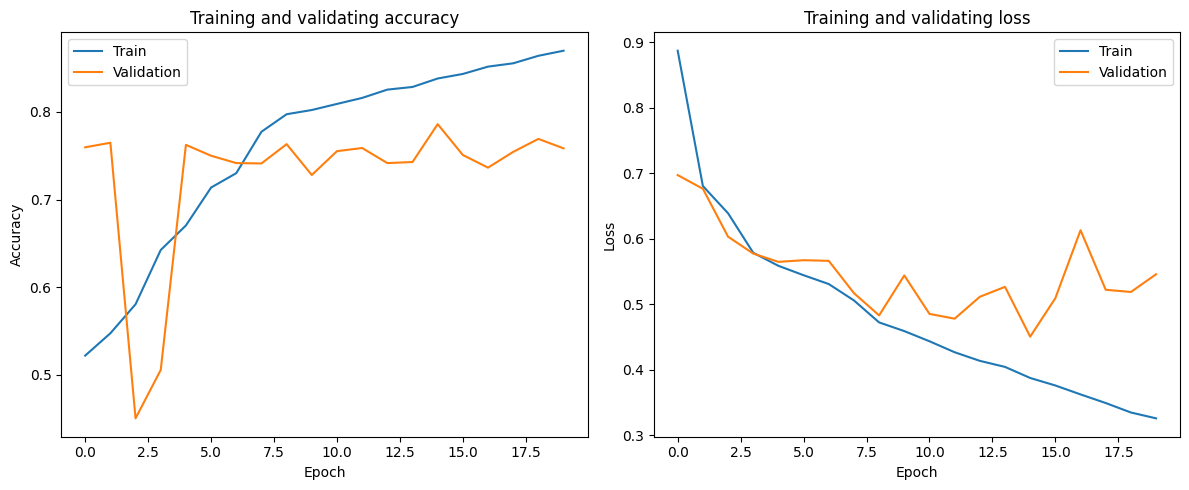

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp3.history['accuracy'], label='Train')
axs[0].plot(history_mlp3.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp3.history['loss'], label='Train')
axs[1].plot(history_mlp3.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 3.8 Setting 8 - Have two convolution layers

filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(2,2)), Dropout(0.2), 
filters=64, kernel_size=(3,3), strides=(2,2), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(2,2)), Dropout(0.2), 
Dropout(0.2), dense: 16+2

In [33]:
# Setting 8
mlp3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            
        layers.Reshape((2,imsize,imsize,3)),          
        layers.LayerNormalization(axis=[-1,-2,-3]),   
        
        # The first convolution layer
        layers.TimeDistributed(layers.Conv2D(32, (3,3) , strides=(2,2), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (3,3) , strides=(2,2))),
        layers.TimeDistributed(layers.Dropout(0.2)),

        # The second convolution layer
        layers.TimeDistributed(layers.Conv2D(64, (3,3) , strides=(2,2), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (3,3) , strides=(2,2))),
        layers.TimeDistributed(layers.Dropout(0.2)),

        
        layers.Flatten(),     
        layers.Dropout(0.2),   

        layers.Dense(16,activation='relu'),           
        layers.Dense(2,activation='softmax')          
    ]
)

mlp3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

history_mlp3 = mlp3.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.5717 - loss: 0.6558 - val_accuracy: 0.8172 - val_loss: 0.3659
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8455 - loss: 0.3684 - val_accuracy: 0.8752 - val_loss: 0.2725
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8676 - loss: 0.3253 - val_accuracy: 0.8900 - val_loss: 0.2415
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8778 - loss: 0.3012 - val_accuracy: 0.8836 - val_loss: 0.2571
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8841 - loss: 0.2865 - val_accuracy: 0.8500 - val_loss: 0.3256
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8891 - loss: 0.2774 - val_accuracy: 0.8644 - val_loss: 0.2977
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8968 - loss: 0.2648 - val_accuracy: 0.8648 - val_loss: 0.3003
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8942 - loss: 0.2646 - 

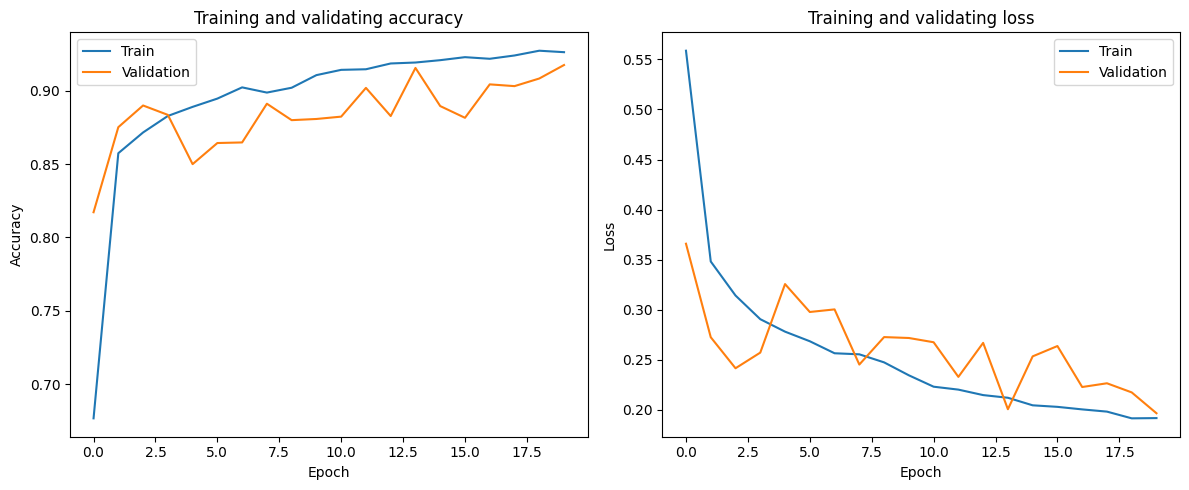

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp3.history['accuracy'], label='Train')
axs[0].plot(history_mlp3.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp3.history['loss'], label='Train')
axs[1].plot(history_mlp3.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 3.9 Setting 9 - Have two convolution layers

filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(1,1)), Dropout(0.2), 
filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(1,1)), Dropout(0.2), 
Dropout(0.2), dense: 16+2

In [35]:
# Setting 9
mlp3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            
        layers.Reshape((2,imsize,imsize,3)),          
        layers.LayerNormalization(axis=[-1,-2,-3]),   
        
        # The first convolution layer
        layers.TimeDistributed(layers.Conv2D(64, (3,3) , strides=(1,1), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (3,3) , strides=(1,1))),
        layers.TimeDistributed(layers.Dropout(0.2)),

        # The second convolution layer
        layers.TimeDistributed(layers.Conv2D(128, (3,3) , strides=(1,1), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (3,3) , strides=(1,1))),
        layers.TimeDistributed(layers.Dropout(0.2)),

        
        layers.Flatten(),   
        layers.Dropout(0.2),     

        layers.Dense(16,activation='relu'),           
        layers.Dense(2,activation='softmax')          
    ]
)

mlp3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

history_mlp3 = mlp3.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 272s 433ms/step - accuracy: 0.4883 - loss: 2.1987 - val_accuracy: 0.8000 - val_loss: 0.6920
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 271s 433ms/step - accuracy: 0.5001 - loss: 0.6932 - val_accuracy: 0.5136 - val_loss: 0.6762
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 275s 439ms/step - accuracy: 0.6998 - loss: 0.5773 - val_accuracy: 0.6988 - val_loss: 0.5366
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 280s 448ms/step - accuracy: 0.7592 - loss: 0.5120 - val_accuracy: 0.6828 - val_loss: 0.5355
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 281s 450ms/step - accuracy: 0.7637 - loss: 0.4977 - val_accuracy: 0.6852 - val_loss: 0.5261
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 288s 461ms/step - accuracy: 0.7707 - loss: 0.4763 - val_accuracy: 0.7128 - val_loss: 0.5044
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 288s 461ms/step - accuracy: 0.7962 - loss: 0.4569 - val_accuracy: 0.7380 - val_loss: 0.5043
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 288s 461ms/step - accuracy: 0.8005 -

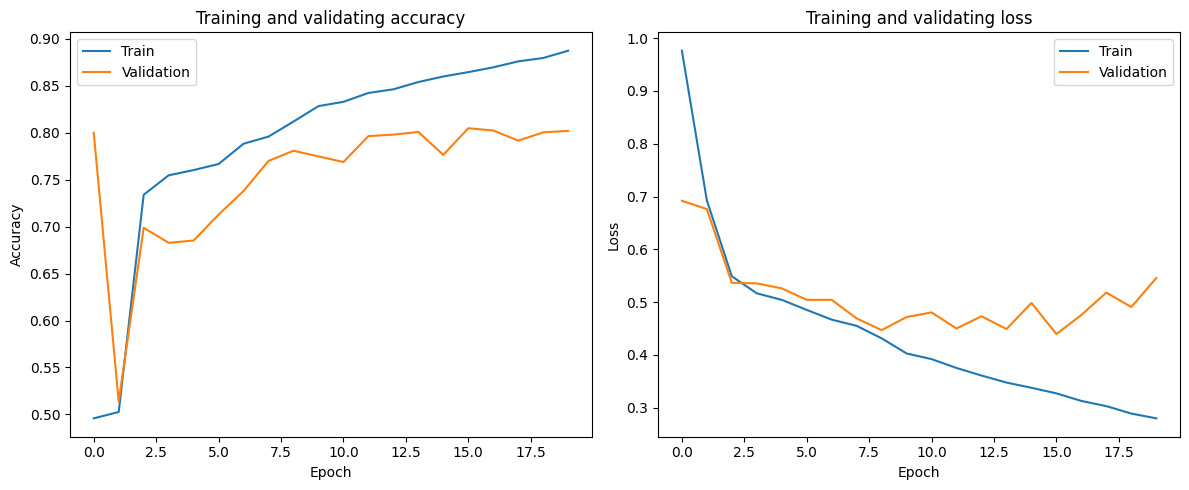

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp3.history['accuracy'], label='Train')
axs[0].plot(history_mlp3.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp3.history['loss'], label='Train')
axs[1].plot(history_mlp3.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### 3.10 Setting 10 - Have two convolution layers

filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(1,1)), Dropout(0.2), 
filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', MaxPooling2D(pool_size= (3,3) , strides=(1,1)), Dropout(0.2), 
Dropout(0.2), dense: 32+4

In [37]:
# Setting 10
mlp3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            
        layers.Reshape((2,imsize,imsize,3)),          
        layers.LayerNormalization(axis=[-1,-2,-3]),   
        
        # The first convolution layer
        layers.TimeDistributed(layers.Conv2D(32, (3,3) , strides=(1,1), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (5,5) , strides=(1,1))),
        layers.TimeDistributed(layers.Dropout(0.2)),

        # The second convolution layer
        layers.TimeDistributed(layers.Conv2D(64, (3,3) , strides=(1,1), activation='relu', padding='same')),
        layers.TimeDistributed(layers.MaxPooling2D(pool_size= (5,5) , strides=(1,1))),
        layers.TimeDistributed(layers.Dropout(0.2)),

        layers.Dropout(0.2),
        layers.Flatten(),        

        layers.Dense(32,activation='relu'),           
        layers.Dense(4,activation='softmax')          
    ]
)

mlp3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

history_mlp3 = mlp3.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 202ms/step - accuracy: 0.5751 - loss: 3.1159 - val_accuracy: 0.7080 - val_loss: 0.5246
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.8228 - loss: 0.4044 - val_accuracy: 0.8444 - val_loss: 0.3246
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.8648 - loss: 0.3297 - val_accuracy: 0.8812 - val_loss: 0.2692
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.8840 - loss: 0.2882 - val_accuracy: 0.9152 - val_loss: 0.2060
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 206ms/step - accuracy: 0.8975 - loss: 0.2591 - val_accuracy: 0.9072 - val_loss: 0.2079
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 206ms/step - accuracy: 0.9098 - loss: 0.2367 - val_accuracy: 0.9044 - val_loss: 0.2205
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.9099 - loss: 0.2320 - val_accuracy: 0.9064 - val_loss: 0.2154
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 206ms/step - accuracy: 0.9176 -

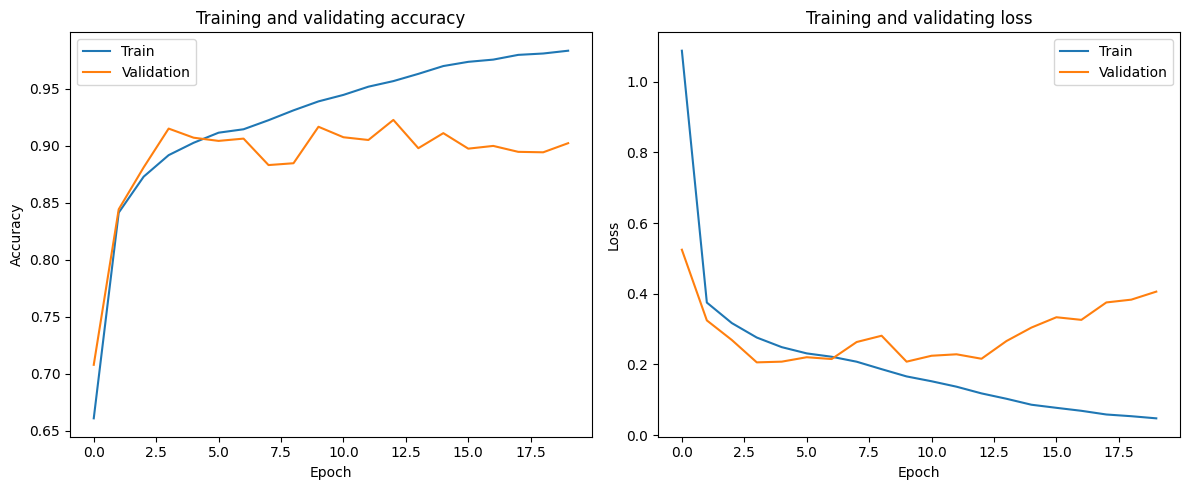

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# first picture of accuracy
axs[0].plot(history_mlp3.history['accuracy'], label='Train')
axs[0].plot(history_mlp3.history['val_accuracy'], label='Validation')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Training and validating accuracy')
axs[0].legend()

# second picture of loss
axs[1].plot(history_mlp3.history['loss'], label='Train')
axs[1].plot(history_mlp3.history['val_loss'], label='Validation')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Training and validating loss')
axs[1].legend()

# show them
plt.tight_layout()
plt.show()

### Select which model you are going to run

If you name your models mlp2, mpl3 etc, you can replace the code with mlp = mlp2 etc.

In [39]:
# mlp = mlp1

In [40]:
# # Configure the model
# mlp.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
#            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #use SparseCategoricalCrossentropy because labels are integers. If the labels are one-hot representation, please use CategoricalCrossentropy loss.
#            metrics=['accuracy'])

In [41]:
# # Start training
# #history_mlp = mlp.fit(x=images, y=labels, epochs=20, validation_split=0.2, shuffle=True)
# history_mlp = mlp.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)


In [42]:
# plt.plot(history_mlp.history['accuracy'], label='Train')
# plt.plot(history_mlp.history['val_accuracy'], label='Validation')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.title('Training and validating accuracy')
# plt.legend()
# plt.show()

In [43]:
# plt.plot(history_mlp.history['loss'], label='Train')
# plt.plot(history_mlp.history['val_loss'], label='Validation')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.title('Training and validating loss')
# plt.legend()
# plt.show()